In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

from word2number import w2n


In [2]:
df = pd.read_csv("Hiring.csv")

In [3]:
# added missing values in df # df['experience'].fillna(value='seven',inplace=True)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000



## 1. Validating missing values by ' fillna '

In [4]:

df.experience.fillna(value='zero',inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


## 2. Converting string to integer using ' word_to_num '

In [1]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

NameError: name 'df' is not defined

## 3. Validating missing values by ' interpolate '

In [6]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].interpolate())
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


## 4. Cross validation of NaN values by using ' heatmap '

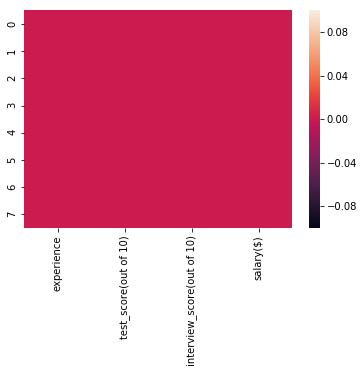

In [7]:
sns.heatmap(df.isnull())

## 5. Create linear regression model

In [8]:
#Visualizing missing values
#sns.heatmap(df.isnull(), yticklabels= False, cmap= 'RdPu')

In [9]:
xx = df.drop('salary($)', axis = 'columns')
yy = df['salary($)']


In [10]:

reg = linear_model.LinearRegression()
reg.fit(xx,yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [12]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [13]:
reg.intercept_

14992.651446693118